# Classification

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import scikitplot
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import RandomizedSearchCV
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
df = pd.read_pickle("./dataunderstanding.pkl")
df.head()

,vocal_channel,emotion,emotional_intensity,repetition,sex,length_ms,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,...,kur,skew,angry,calm,disgust,fearful,happy,neutral,sad,surprised
0,0,fearful,0,2,1,3737,-36.793432,16995,-33.485947,134.654860,...,9.406061,0.273153,0,0,0,1,0,0,0,0
1,0,angry,0,1,1,3904,-37.443235,13906,-29.502108,130.485630,...,19.564187,0.292157,1,0,0,0,0,0,0,0
2,0,happy,1,2,1,4671,-32.290737,18723,-30.532463,126.577110,...,4.881241,0.302659,0,0,0,0,1,0,0,0
3,0,surprised,0,1,1,3637,-49.019839,11617,-36.059555,159.725160,...,13.040259,-0.081014,0,0,0,0,0,0,0,1
4,1,happy,1,2,1,4404,-31.214503,15137,-31.405996,122.125824,...,7.485109,0.414872,0,0,0,0,1,0,0,0


## Our target

In [3]:
target = 'emotion'

Index(['vocal_channel', 'emotion', 'emotional_intensity', 'repetition', 'sex',
       'length_ms', 'intensity', 'zero_crossings_sum', 'mfcc_mean', 'mfcc_std',
       'mfcc_min', 'mfcc_max', 'sc_mean', 'sc_std', 'sc_min', 'sc_max',
       'sc_kur', 'sc_skew', 'stft_kur', 'stft_skew', 'max', 'kur', 'skew',
       'angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad',
       'surprised'],
      dtype='object')

## Normalizing the dataset

In [38]:
#Dropping columns not useful for analisys
dfnaf = df.drop(['emotion', 'angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral','sad', 'surprised'], axis =1)
dfnaf

,vocal_channel,emotional_intensity,repetition,sex,length_ms,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,...,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_kur,stft_skew,max,kur,skew
0,0,0,2,1,3737,-36.793432,16995,-33.485947,134.654860,-755.22345,...,3328.055457,0.000000,11096.082688,-1.120769,0.250940,-1.215025,0.403514,0.138947,9.406061,0.273153
1,0,0,1,1,3904,-37.443235,13906,-29.502108,130.485630,-713.98560,...,4040.931570,0.000000,12000.290443,-1.531204,0.219582,-1.384174,0.290905,0.263062,19.564187,0.292157
2,0,1,2,1,4671,-32.290737,18723,-30.532463,126.577110,-726.06036,...,3332.131300,0.000000,12007.751173,-1.130153,0.436699,-1.242947,0.470350,0.166351,4.881241,0.302659
3,0,0,1,1,3637,-49.019839,11617,-36.059555,159.725160,-842.94635,...,4053.663073,0.000000,12048.223893,-1.497765,0.098802,-1.445318,0.274756,0.024078,13.040259,-0.081014
4,1,1,2,1,4404,-31.214503,15137,-31.405996,122.125824,-700.70276,...,3442.724109,0.000000,12025.582707,-1.167544,0.496066,-1.366742,0.318926,0.242676,7.485109,0.414872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,0,1,1,0,4605,-42.136827,9871,-30.225578,158.845500,-855.92420,...,4114.260257,0.000000,12210.517144,-1.588861,0.184390,-1.075888,-0.310088,0.052399,9.551363,0.759247
2448,0,0,1,0,4171,-43.342901,8963,-31.160332,157.499700,-825.37410,...,4191.727090,0.000000,12064.561791,-1.614582,-0.113920,-1.026071,-0.408018,0.084045,22.517991,1.073633
2449,1,1,2,0,5239,-37.919308,9765,-26.135280,138.133210,-768.36536,...,4231.511986,0.000000,12207.179884,-1.337419,0.619346,-1.473789,0.130310,0.097260,4.964319,-0.005821
2450,0,0,1,0,3737,-45.751265,9716,-28.242815,159.943400,-868.09576,...,3596.031841,760.822547,11981.912464,-1.465594,0.206481,-1.277117,-0.242668,0.052002,13.855588,-0.110966


In [39]:
#Extracting the matrices of the independent variables in x and the vector of the target variable in y
X = dfnaf.values
y = df[target].values

In [72]:
#Normalizing
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Dividing data in training, validation and test

In [73]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [74]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                  test_size=0.3, stratify=y_train_val, random_state=0)

In [75]:
len(X_train), len(X_val), len(X_test)

(1201, 515, 736)

## KNN classification

Before using KNN we proceded to normalize data due to the dimensionality of the data.

Because splitting the dataset into training set and validation set (holdout) it is possible to have non-optimal subdivisions, for this reason we applied a repeated subdivision to made different subsamples (repeated holdout).

With repeated houldout we dont have no guarantee that all the records will be used for training and validation. For this we also utilized cross validation, to avoid overlap between the validation sets, using the entire training set both as training and validation.

In [10]:
#Specifying the number of neighbors, instantiating the object, learning and prediction
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
y_pred_train = knn.predict(X_train)

In [11]:
#Accuracy
accuracy_score(y_val, y_pred), accuracy_score(y_train, y_pred_train)

(0.33980582524271846, 0.5778517901748543)

In [12]:
#Plotting for different K points neighbors and Accuracy
acc_val_list = list()
acc_train_list = list()
for k in np.arange(1, 20+1, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    y_pred_train = knn.predict(X_train)
    acc_val_list.append(accuracy_score(y_val, y_pred))
    acc_train_list.append(accuracy_score(y_train, y_pred_train))

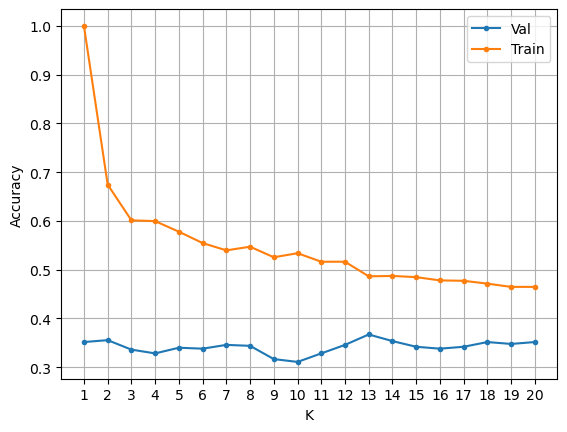

In [13]:
plt.plot(np.arange(1, 20+1, 1), acc_val_list, label='Val', marker='.')
plt.plot(np.arange(1, 20+1, 1), acc_train_list, label='Train', marker='.')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 20+1, 1))
plt.grid()
plt.legend()
plt.show()

### Repeated Holdout

In [14]:
nbr_holdout = 10
acc_val_list_all = list()
acc_train_list_all = list()
for i in range(nbr_holdout):

    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                      test_size=0.3,
                                                      stratify=y_train_val,
                                                      random_state=i)

    acc_val_list = list()
    acc_train_list = list()
    for k in np.arange(1, 20+1, 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_val)
        y_pred_train = knn.predict(X_train)
        acc_val_list.append(accuracy_score(y_val, y_pred))
        acc_train_list.append(accuracy_score(y_train, y_pred_train))

    acc_val_list_all.append(acc_val_list)
    acc_train_list_all.append(acc_train_list)

In [15]:
acc_val_list_all = np.array(acc_val_list_all)
acc_train_list_all = np.array(acc_train_list_all)

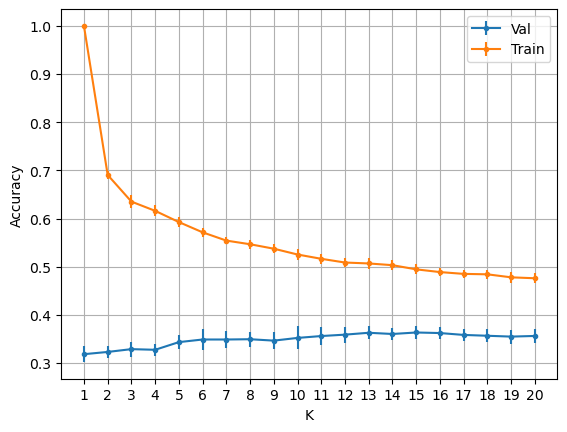

In [16]:
#Plotting Accuracy for different k after holdout with std
plt.errorbar(x=np.arange(1, 20+1, 1),
             y=np.mean(acc_val_list_all, axis=0),
             yerr=np.std(acc_val_list_all, axis=0),
             label='Val', marker='.')

plt.errorbar(x=np.arange(1, 20+1, 1),
             y=np.mean(acc_train_list_all, axis=0),
             yerr=np.std(acc_train_list_all, axis=0),
             label='Train', marker='.')

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 20+1, 1))
plt.grid()
plt.legend()
plt.show()

### Cross validation

In [17]:
acc_list_mean = list()
acc_list_std = list()
for k in np.arange(1, 20+1, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_val, y_train_val, cv=10)
    acc_list_mean.append(np.mean(scores))
    acc_list_std.append(np.std(scores))

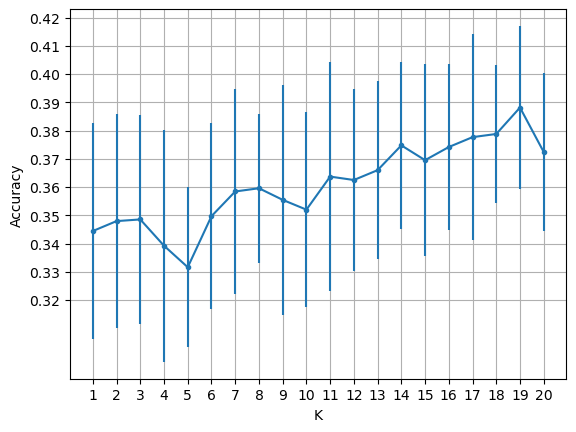

In [18]:
plt.errorbar(x=np.arange(1, 20+1, 1),
             y=acc_list_mean,
             yerr=acc_list_std,
             marker='.')

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0.32, 0.42+0.01, 0.01))
plt.xticks(np.arange(1, 20+1, 1))
plt.grid()
plt.show()

In [19]:
#Making a for loop of cross validation for each k to reduce the error
nbr_repetitions = 5
acc_list_all = list()
for i in range(nbr_repetitions):
    acc_list = list()
    for k in np.arange(1, 20+1, 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train_val, y_train_val, cv=10, #k-fold
                                 scoring='accuracy')
        acc_list.append(scores)

    acc_list_all.append(acc_list)

In [20]:
acc_list_all = np.array(acc_list_all)

In [21]:
np.mean(acc_list_all.reshape(50, 20), axis=0)

array([0.375     , 0.3372093 , 0.32325581, 0.34011628, 0.375     ,
       0.35697674, 0.42280702, 0.38070175, 0.36023392, 0.33216374,
       0.37616279, 0.34069767, 0.32732558, 0.34011628, 0.37383721,
       0.35813953, 0.41754386, 0.37251462, 0.36315789, 0.34152047])

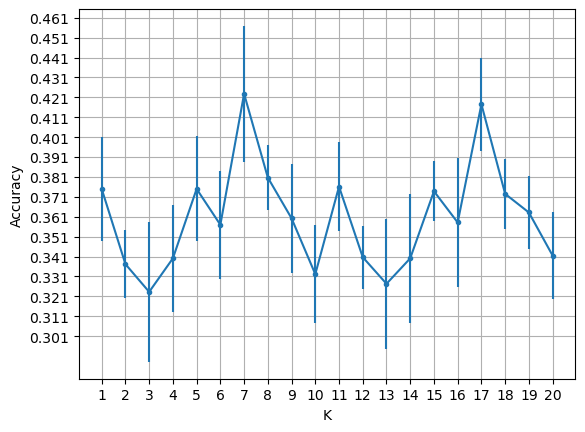

In [22]:
plt.errorbar(x=np.arange(1, 20+1, 1),
             y=np.mean(acc_list_all.reshape(50, 20), axis=0),
             yerr=np.std(acc_list_all.reshape(50, 20), axis=0),
             marker='.')

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 20+1, 1))
plt.yticks(np.arange(0.301, 0.46+0.01, 0.01))
plt.grid()
plt.show()

### The final KNN model

We chosed k = 7 for the KNN after analysing the different values of accuracy and std and selecting the best combination

In [23]:
#The final value ok k selected
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_val, y_train_val)

y_pred = knn.predict(X_test)
print(classification_report(y_pred, y_test)) # on test set

y_pred_trainval = knn.predict(X_train_val)
print(classification_report(y_pred_trainval, y_train_val)) # on training set

              precision    recall  f1-score   support

       angry       0.64      0.55      0.59       131
        calm       0.50      0.37      0.42       152
     disgust       0.31      0.40      0.35        45
     fearful       0.37      0.34      0.36       122
       happy       0.19      0.21      0.20       105
     neutral       0.29      0.28      0.28        58
         sad       0.18      0.31      0.22        65
   surprised       0.39      0.38      0.38        58

    accuracy                           0.36       736
   macro avg       0.36      0.35      0.35       736
weighted avg       0.39      0.36      0.37       736

              precision    recall  f1-score   support

       angry       0.75      0.62      0.68       319
        calm       0.70      0.61      0.65       301
     disgust       0.59      0.62      0.61       127
     fearful       0.61      0.53      0.56       304
       happy       0.50      0.52      0.51       250
     neutral       0.47 

### Simulating KNN with different volumes of test and validation set with respect to metrics

After plotting the different accuracy for different size of the selected dataset we can observe that that accuracy is directly proportional to data volume. The accuracy for each metric was comparable but for manhattan the Accuracy score for the validation set was relatively higher, for this reason we selected this metric.
If the volume of the dataset was bigger and not easly processable we could have chosen a portion of data, for example cutting for p=0.7, but in our case we decided to keep the entire dataset.

In [24]:
#Euclidean
nbr_repetitions = 5
acc_val_list_all = list()
acc_train_list_all = list()
for p in np.arange(0.1, 1.1, 0.1):
    acc_val_list = list()
    acc_train_list = list()
    for i in range(nbr_repetitions):
        index = np.random.choice(np.arange(len(X_train)), int(len(X_train) * p), replace=False)
        knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
        knn.fit(X_train[index], y_train[index])
        y_pred = knn.predict(X_val)
        y_pred_train = knn.predict(X_train[index])
        acc_val_list.append(accuracy_score(y_val, y_pred))
        acc_train_list.append(accuracy_score(y_train[index], y_pred_train))

    acc_val_list_all.append(acc_val_list)
    acc_train_list_all.append(acc_train_list)

In [25]:
acc_val_list_all = np.array(acc_val_list_all)
acc_train_list_all = np.array(acc_train_list_all)

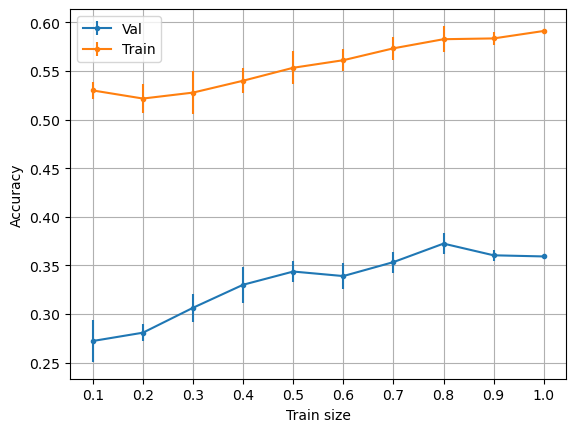

In [26]:
plt.errorbar(x=np.arange(0.1, 1.1, 0.1),
             y=np.mean(acc_val_list_all, axis=1),
             yerr=np.std(acc_val_list_all, axis=1),
             label='Val', marker='.')

plt.errorbar(x=np.arange(0.1, 1.1, 0.1),
             y=np.mean(acc_train_list_all, axis=1),
             yerr=np.std(acc_train_list_all, axis=1),
             label='Train', marker='.')

plt.xlabel('Train size')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0.1, 1.1, 0.1))
plt.grid()
plt.legend()
plt.show()

In [27]:
#Manhattan
nbr_repetitions = 5
acc_val_list_all = list()
acc_train_list_all = list()
for p in np.arange(0.1, 1.0, 0.1):
    acc_val_list = list()
    acc_train_list = list()
    for i in range(nbr_repetitions):
        index = np.random.choice(np.arange(len(X_train)), int(len(X_train) * p), replace=False)
        knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
        knn.fit(X_train[index], y_train[index])
        y_pred = knn.predict(X_val)
        y_pred_train = knn.predict(X_train[index])
        acc_val_list.append(accuracy_score(y_val, y_pred))
        acc_train_list.append(accuracy_score(y_train[index], y_pred_train))

    acc_val_list_all.append(acc_val_list)
    acc_train_list_all.append(acc_train_list)

In [28]:
acc_val_list_all = np.array(acc_val_list_all)
acc_train_list_all = np.array(acc_train_list_all)

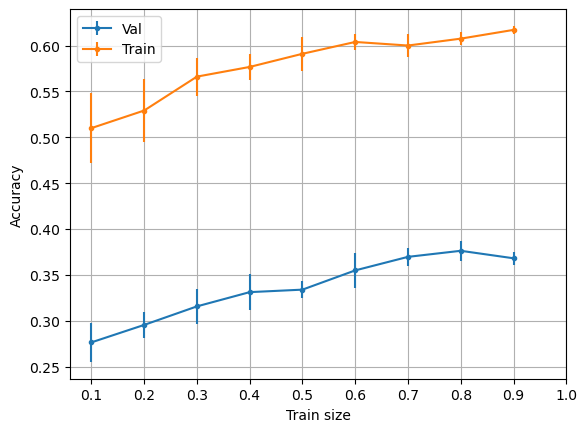

In [29]:
plt.errorbar(x=np.arange(0.1, 1.0, 0.1),
             y=np.mean(acc_val_list_all, axis=1),
             yerr=np.std(acc_val_list_all, axis=1),
             label='Val', marker='.')

plt.errorbar(x=np.arange(0.1, 1.0, 0.1),
             y=np.mean(acc_train_list_all, axis=1),
             yerr=np.std(acc_train_list_all, axis=1),
             label='Train', marker='.')

plt.xlabel('Train size')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0.1, 1.1, 0.1))
plt.grid()
plt.legend()
plt.show()

In [30]:
#Cosine
nbr_repetitions = 5
acc_val_list_all = list()
acc_train_list_all = list()
for p in np.arange(0.1, 1.1, 0.1):
    acc_val_list = list()
    acc_train_list = list()
    for i in range(nbr_repetitions):
        index = np.random.choice(np.arange(len(X_train)), int(len(X_train) * p), replace=False)
        knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')
        knn.fit(X_train[index], y_train[index])
        y_pred = knn.predict(X_val)
        y_pred_train = knn.predict(X_train[index])
        acc_val_list.append(accuracy_score(y_val, y_pred))
        acc_train_list.append(accuracy_score(y_train[index], y_pred_train))

    acc_val_list_all.append(acc_val_list)
    acc_train_list_all.append(acc_train_list)

In [31]:
acc_val_list_all = np.array(acc_val_list_all)
acc_train_list_all = np.array(acc_train_list_all)

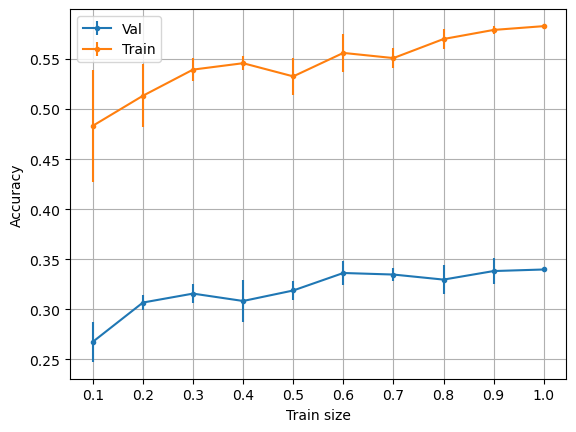

In [32]:
plt.errorbar(x=np.arange(0.1, 1.1, 0.1),
             y=np.mean(acc_val_list_all, axis=1),
             yerr=np.std(acc_val_list_all, axis=1),
             label='Val', marker='.')

plt.errorbar(x=np.arange(0.1, 1.1, 0.1),
             y=np.mean(acc_train_list_all, axis=1),
             yerr=np.std(acc_train_list_all, axis=1),
             label='Train', marker='.')

plt.xlabel('Train size')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0.1, 1.1, 0.1))
plt.grid()
plt.legend()
plt.show()

### Chosen Hyperparameters

p = 1, metric = manhattan, neighbors = 7

In [33]:
nbr_repetitions = 5
acc_val_list_all = list()
acc_train_list_all = list()

for i in range(nbr_repetitions):
    acc_val_list = list()
    acc_train_list = list()
    index = np.random.choice(np.arange(len(X_train)), int(len(X_train) * 1), replace=False)
    knn_final = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
    knn_final.fit(X_train[index], y_train[index])
    y_pred = knn_final.predict(X_val)
    y_pred_train = knn_final.predict(X_train[index])
    acc_val_list.append(accuracy_score(y_val, y_pred))
    acc_train_list.append(accuracy_score(y_train[index], y_pred_train))

acc_val_list_all.append(acc_val_list)
acc_train_list_all.append(acc_train_list)

In [34]:
mean_acc_val = np.mean(acc_val_list_all)
std_acc_val = np.std(acc_val_list_all)
mean_acc_train = np.mean(acc_train_list_all)
std_acc_train = np.std(acc_train_list_all)

In [35]:
print(f"Media accuracy validazion: {mean_acc_val:.2f} ± {std_acc_val:.2f}")
print(f"Media accuracy train: {mean_acc_train:.2f} ± {std_acc_train:.2f}")

Media accuracy validazion: 0.40 ± 0.00
Media accuracy train: 0.58 ± 0.00


In [36]:
y_pred = knn_final.predict(X_test)
print(classification_report(y_pred, y_test)) # on test set

y_pred_trainval = knn_final.predict(X_train_val)
print(classification_report(y_pred_trainval, y_train_val)) # on training set

              precision    recall  f1-score   support

       angry       0.65      0.52      0.58       143
        calm       0.62      0.47      0.53       150
     disgust       0.36      0.39      0.38        54
     fearful       0.35      0.44      0.39        89
       happy       0.26      0.27      0.26       108
     neutral       0.34      0.28      0.31        67
         sad       0.19      0.35      0.25        63
   surprised       0.35      0.32      0.34        62

    accuracy                           0.40       736
   macro avg       0.39      0.38      0.38       736
weighted avg       0.44      0.40      0.41       736

              precision    recall  f1-score   support

       angry       0.74      0.56      0.64       348
        calm       0.70      0.56      0.62       327
     disgust       0.49      0.52      0.50       124
     fearful       0.50      0.53      0.51       247
       happy       0.48      0.49      0.48       257
     neutral       0.48 

In [37]:
cm = confusion_matrix(y_test, y_pred)


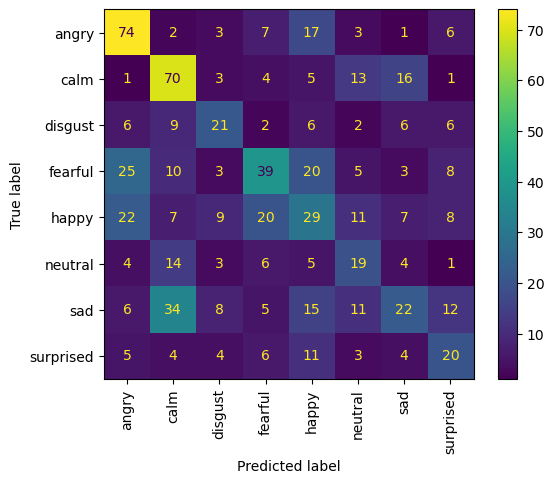

In [38]:
disp = ConfusionMatrixDisplay(cm, display_labels=knn.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

# Decision Tree

### Choosing best parameters

In [39]:
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    ccp_alpha=0.0,
    random_state=0,
)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)
accuracy_score(y_val, y_pred)

0.34563106796116505

In [40]:
param_dict = {
    'max_depth': np.arange(1, 20+1, 1).tolist() + [None],
    'min_samples_split': np.arange(2, 50+1, 1),
    'min_samples_leaf': np.arange(1, 30+1, 1),
    'ccp_alpha': np.arange(0.0, 0.1, 0.01)
}

In [153]:
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    ccp_alpha=0.0,
    random_state=0
)
rands = RandomizedSearchCV(clf, param_dict, cv=5, scoring='accuracy', refit=True, n_iter=100)
rands.fit(X_train_val, y_train_val)

clf = rands.best_estimator_

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.3736413043478261

In [164]:
rands.best_params_

{'min_samples_split': 9,
 'min_samples_leaf': 14,
 'max_depth': 17,
 'ccp_alpha': 0.0}

In [165]:
clf = rands.best_estimator_

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.35190217391304346

## Best parameter found are: Gini, max_depth=9, min_samples_leaf=14, min_samples_split=10, random_state=0 , 0.375

In [168]:
clf_final = DecisionTreeClassifier(
    criterion='gini',
    max_depth=9,
    min_samples_split=10,
    min_samples_leaf=14,
    ccp_alpha=0.0,
    random_state=0
)

In [169]:
clf_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=14, min_samples_split=10,
                       random_state=0)

In [170]:
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [171]:
accuracy_score(y_test, y_pred)

0.35190217391304346

In [172]:
accuracy_score(y_train, y_pred_train)

0.5528726061615321

In [173]:
clf_final.classes_

array(['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad',
       'surprised'], dtype=object)

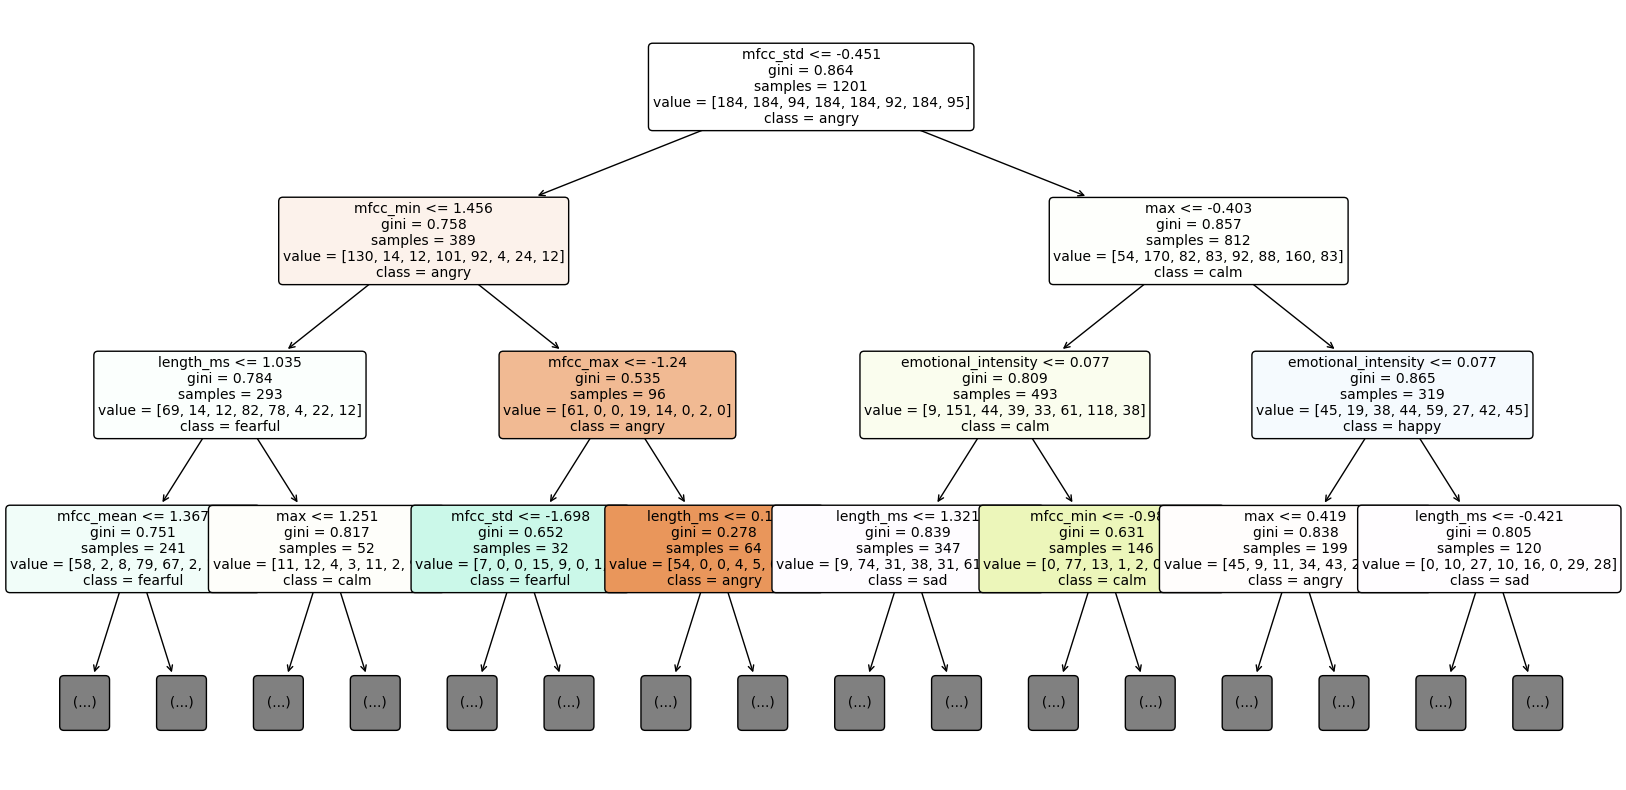

In [174]:
plt.figure(figsize=(20, 10))
plot_tree(clf_final,
          feature_names=dfnaf.columns,
          class_names=clf.classes_,
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3
          )
plt.show()

In [83]:
columns = ['vocal_channel', 'emotional_intensity', 'repetition', 'sex',
       'length_ms', 'intensity', 'zero_crossings_sum',
       'mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max', 'sc_mean', 'sc_std',
       'sc_min', 'sc_max', 'sc_kur', 'sc_skew', 'stft_kur', 'stft_skew', 'max',
       'kur', 'skew']

In [52]:
clf_final.feature_importances_

array([0.03581011, 0.0580945 , 0.        , 0.        , 0.21719776,
       0.00734331, 0.03632028, 0.0175441 , 0.2653537 , 0.        ,
       0.05495787, 0.00504121, 0.02367152, 0.        , 0.00481298,
       0.00690979, 0.03775345, 0.0093349 , 0.03701993, 0.11798042,
       0.03901406, 0.02584012])

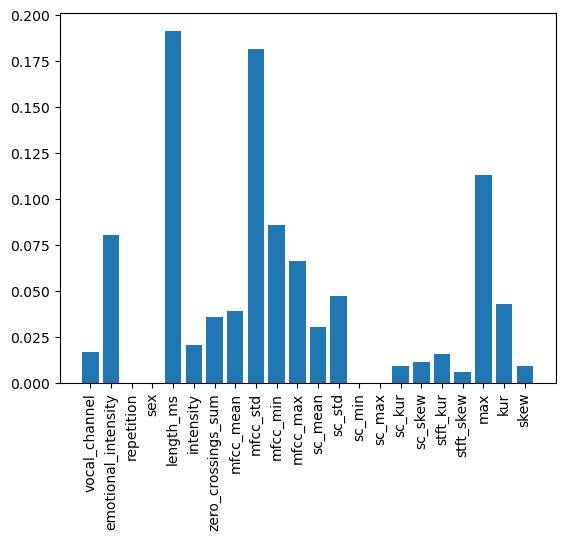

In [175]:
plt.bar(columns, clf_final.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [179]:
y_pred = clf_final.predict(X_test)
print(classification_report(y_pred, y_test)) # on test set

y_pred_trainval = clf_final.predict(X_train_val)
print(classification_report(y_pred_trainval, y_train_val)) # on training set

              precision    recall  f1-score   support

       angry       0.62      0.50      0.56       139
        calm       0.54      0.39      0.46       155
     disgust       0.16      0.26      0.20        34
     fearful       0.27      0.25      0.26       119
       happy       0.19      0.37      0.25        60
     neutral       0.46      0.33      0.39        78
         sad       0.21      0.24      0.22       101
   surprised       0.28      0.32      0.30        50

    accuracy                           0.35       736
   macro avg       0.34      0.33      0.33       736
weighted avg       0.39      0.35      0.36       736

              precision    recall  f1-score   support

       angry       0.72      0.56      0.63       340
        calm       0.72      0.56      0.63       340
     disgust       0.27      0.51      0.35        70
     fearful       0.48      0.48      0.48       265
       happy       0.28      0.53      0.36       138
     neutral       0.53 

In [177]:
cm = confusion_matrix(y_test, y_pred)

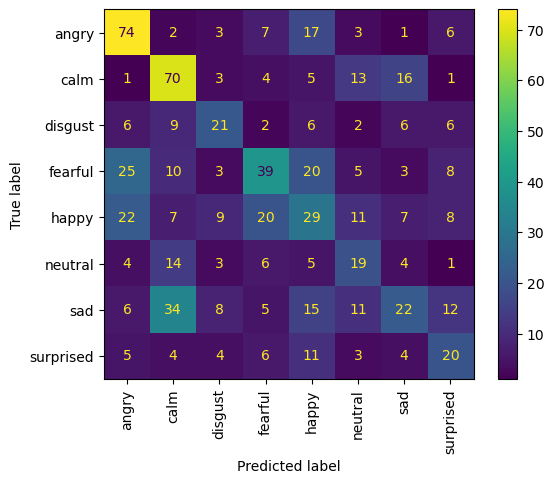

In [178]:
disp = ConfusionMatrixDisplay(cm, display_labels=clf_final.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

In [56]:
y_pred_proba = clf_final.predict_proba(X_test)

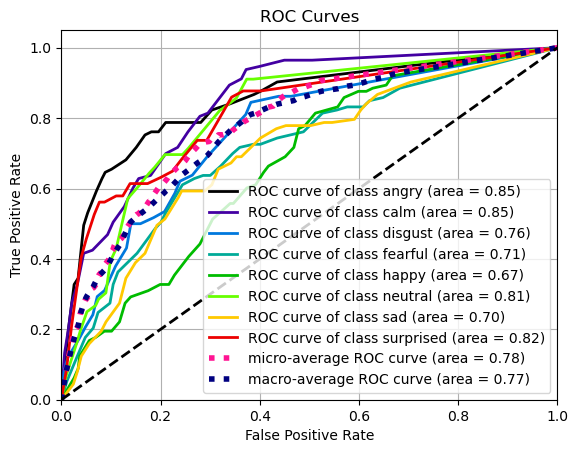

In [57]:
scikitplot.metrics.plot_roc(y_test, y_pred_proba)
plt.grid()
plt.show()

#### We can see we have an avg area of 0.77, considering 1 is the ideal area we can say this is a very good result

# Random Forest

In [92]:
clf = RandomForestClassifier(
    n_estimators=20,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    ccp_alpha=0.0,
    max_features='sqrt',
    random_state=0
)

rands = RandomizedSearchCV(clf, param_dict, cv=5, scoring='accuracy', refit=True, n_iter=100)
rands.fit(X_train_val, y_train_val)
clf = rands.best_estimator_

clf.fit(X_train_val, y_train_val)

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.44157608695652173

### Best parameters found: Gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=20, random_state=0, with these i get an accuracy of 0.459

In [180]:
clf = RandomForestClassifier(
    n_estimators=20,
    criterion='gini',
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    ccp_alpha=0.0,
    max_features='sqrt',
    random_state=0
)

clf.fit(X_train_val, y_train_val)

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.4592391304347826

In [181]:
clf

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=20, random_state=0)

In [182]:
clf.feature_importances_

array([0.01015097, 0.02417141, 0.00403691, 0.00416634, 0.08082018,
       0.07114008, 0.04667245, 0.0508531 , 0.06574126, 0.07632572,
       0.05450742, 0.04389999, 0.0398215 , 0.02909168, 0.03427273,
       0.0466012 , 0.04862265, 0.04326731, 0.04377773, 0.06539676,
       0.06409639, 0.05256621])

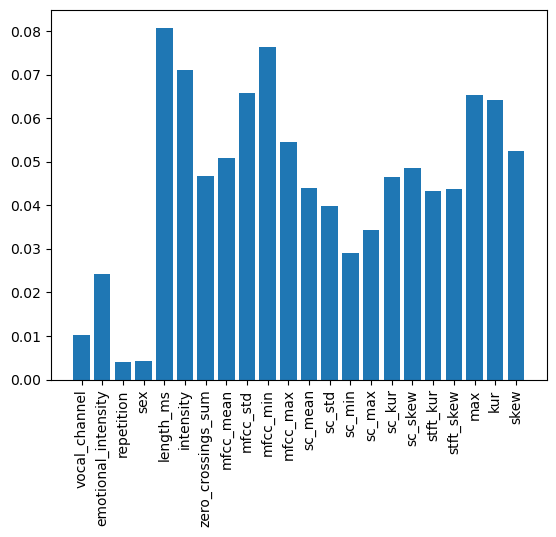

In [183]:
plt.bar(columns, clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [185]:
y_pred = clf.predict(X_test)
print(classification_report(y_pred, y_test)) # on test set

y_pred_trainval = clf.predict(X_train_val)
print(classification_report(y_pred_trainval, y_train_val)) # on training set

              precision    recall  f1-score   support

       angry       0.71      0.62      0.66       128
        calm       0.68      0.49      0.57       157
     disgust       0.28      0.47      0.35        34
     fearful       0.38      0.46      0.42        94
       happy       0.36      0.36      0.36       113
     neutral       0.41      0.38      0.39        61
         sad       0.27      0.33      0.30        94
   surprised       0.47      0.49      0.48        55

    accuracy                           0.46       736
   macro avg       0.45      0.45      0.44       736
weighted avg       0.49      0.46      0.47       736

              precision    recall  f1-score   support

       angry       1.00      0.98      0.99       266
        calm       0.99      0.99      0.99       263
     disgust       0.98      0.99      0.98       132
     fearful       0.99      0.98      0.99       266
       happy       0.97      0.99      0.98       258
     neutral       0.98 

In [113]:
cm = confusion_matrix(y_test, y_pred)

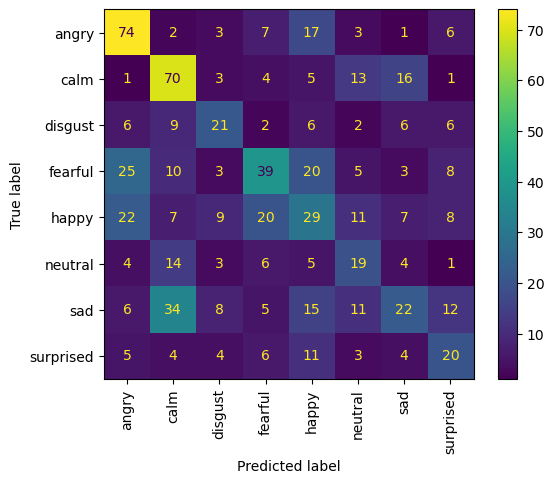

In [186]:
disp = ConfusionMatrixDisplay(cm, display_labels=clf_final.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

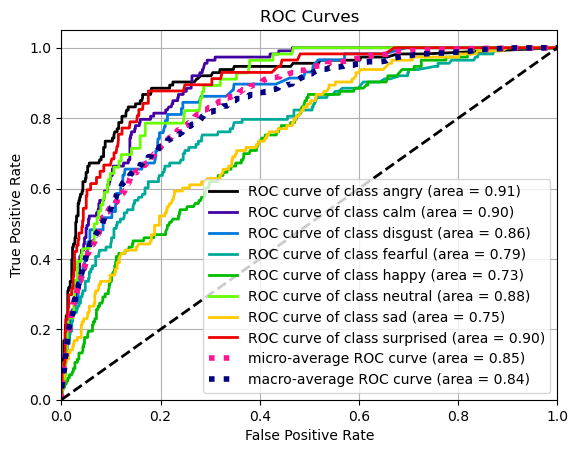

In [187]:
y_pred_proba = clf.predict_proba(X_test)
scikitplot.metrics.plot_roc(y_test, y_pred_proba)
plt.grid()
plt.show()

## Conclusion classification:

As we can see in all the confusion matrix, the classification of a True 'Sad' emotion is always between 19% and 27% almost as always saying the emotion is Sad, due to we have 8 emotions with a 20% probability. Also, every model confuses fearful and happy with angry. We tought that the issue of predicting sad as calm is due to the similarity between features of these two emotions. The most easy classification are Angry and Calm getting an average of 70% accuracy. After analyzing every model we conclude that the best for our data is Random forest getting an average accuracy of 46% and the area under the curve for ROC goes up to an average of 0.84.

## Regression

Using a multiple linear regression model, our aim was to predict the variable 'mfcc_std'. We used 'mfcc_min','mfcc_max' and 'sc_std' as explanatory variables. 'mfcc_max' and 'sc_std' have a remarkable positive correlation with the feature we want to predict. On the contrary, 'mfcc_min' is strongly uncorrelated to 'mfcc_std'. We tried to make the prediction using Linear Regression model, Lasso and Ridge and in all those three models there isn't any big change in the performances. Therefore, we decided to use LinearRegression.

In [46]:
#choosing target variable and explanatory variables
target = 'mfcc_std'
columns = ['mfcc_min', 'mfcc_max', 'sc_std']

X = df[columns]
y = df[target]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
#linear regression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print('MSE: %.2f' % mean_squared_error(y_test, y_pred))
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))
print('R2: %.2f' % r2_score(y_test, y_pred))
print('MAPE: %.2f' % mean_absolute_percentage_error(y_test, y_pred))

MSE: 33.02
MAE: 3.30
R2: 0.92
MAPE: 0.02


/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:605: Fu

In [49]:
#normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:767: Fu

In [50]:
#Lasso regression
reg = Lasso()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MAPE: %.3f' % mean_absolute_percentage_error(y_test, y_pred))

MSE: 34.784
MAE: 3.488
R2: 0.915
MAPE: 0.026


/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be 

In [51]:
#Ridge regression
reg = Ridge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MAPE: %.3f' % mean_absolute_percentage_error(y_test, y_pred))

MSE: 33.023
MAE: 3.303
R2: 0.919
MAPE: 0.025


/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be 

## Simple Linear regression

At the same time, we tried to predict the same variable using a simple linear regression to see if there were big changes in the performances. In this case, we used 'mfcc_min' as explanatory variable. We tried to make the prediction using Linear Regression model, Lasso and Ridge and in all those three models there isn't any big change in the performances. Therefore, we decided to use LinearRegression, the model that has a best R2 performance. Having chosen as explanatory variable a feature stronlgy uncorrelated to mfcc_std we could have multicollinearity problem, that's why we tried to make this prediction using the Ridge model (a model that has as aim to mitigate multicollinearity problem), however, as we already said, performances were equivalent.

In [52]:
#choosing target variable and explanatory variable
target = 'mfcc_std'
columns = ['mfcc_min']

X = df[columns]
y = df[target]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [54]:
#linear regression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print('MSE: %.2f' % mean_squared_error(y_test, y_pred))
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))
print('R2: %.2f' % r2_score(y_test, y_pred))
print('MAPE: %.2f' % mean_absolute_percentage_error(y_test, y_pred))

MSE: 38.00
MAE: 3.74
R2: 0.91
MAPE: 0.03


/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:605: Fu

In [55]:
#normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:767: Fu

In [56]:
#Lasso regression
reg = Lasso()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MAPE: %.3f' % mean_absolute_percentage_error(y_test, y_pred))

MSE: 39.219
MAE: 3.848
R2: 0.904
MAPE: 0.028


/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be 

In [57]:
#Ridge regression
reg = Ridge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MAPE: %.3f' % mean_absolute_percentage_error(y_test, y_pred))

MSE: 38.000
MAE: 3.743
R2: 0.907
MAPE: 0.028


/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ramiropredassi/anaconda3/envs/env_maser/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be 

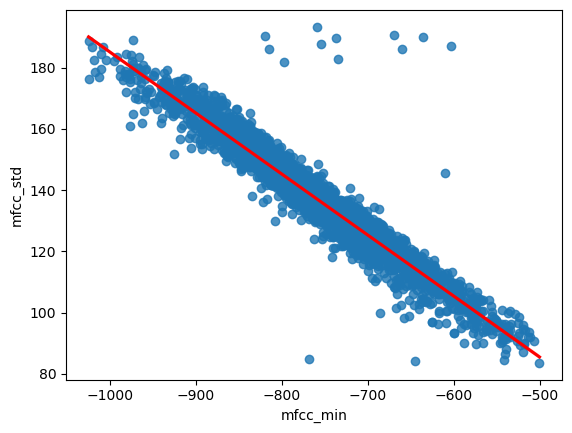

In [58]:
#plotting the result
sns.regplot(x="mfcc_min", y="mfcc_std", data=dfnaf, line_kws=dict(color="r"), marker="o");
plt.show()

As we can see, in this case, there is no difference in predicting the variable using just one feature or more. The performances scores that we obtained in both cases are equivalent.